## Import Packages

In [48]:
# Basic
import pandas as pd
import seaborn as sns

# Warning
import warnings
warnings.filterwarnings('ignore')

### Pre-defined Functions

In [33]:
# compare score of home and away teams
def result_finder(home, away):
        if home > away:
                return pd.Series([0, 3, 0])
        if home < away:
                return pd.Series([1, 0, 3])
        else:
                return pd.Series([2, 1, 1])

In [51]:
def stats(team_stats):
        stats_val = []

        for index, row in team_stats.iterrows():
                team = row["team"]
                date = row["date"]
                past_games = team_stats.loc[(team_stats["team"] == team) & (team_stats["date"] < date)].sort_values(by=['date'], ascending=False)
                last5 = past_games.head(5)

                goals = past_games["score"].mean()
                goals_l5 = last5["score"].mean()

                goals_suf = past_games["suf_score"].mean()
                goals_suf_l5 = last5["suf_score"].mean()

                rank = past_games["rank_suf"].mean()
                rank_l5 = last5["rank_suf"].mean()

                if len(last5) > 0:
                        points = past_games["total_points"].values[0] - past_games["total_points"].values[-1]#qtd de pontos ganhos
                        points_l5 = last5["total_points"].values[0] - last5["total_points"].values[-1]
                else:
                        points = 0
                        points_l5 = 0

                gp = past_games["team_points"].mean()
                gp_l5 = last5["team_points"].mean()

                gp_rank = past_games["points_by_rank"].mean()
                gp_rank_l5 = last5["points_by_rank"].mean()

                stats_val.append([goals, goals_l5, goals_suf, goals_suf_l5, rank, rank_l5, points, points_l5, gp, gp_l5, gp_rank, gp_rank_l5])

        return stats_val, team_stats

In [60]:
def find_friendly(x):
        if x == "Friendly":
                return 1
        else: return 0

## Read Data

In [3]:
# read data files
ranking = pd.read_csv('fifa_ranking-2022-10-06.csv')
shootouts = pd.read_csv('shootouts.csv')
results = pd.read_csv('results.csv')
gs = pd.read_csv('goalscorers.csv')

## Inspect Data

In [12]:
ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,1,Germany,GER,57.0,0.0,0,UEFA,1992-12-31
1,96,Syria,SYR,11.0,0.0,0,AFC,1992-12-31
2,97,Burkina Faso,BFA,11.0,0.0,0,CAF,1992-12-31
3,99,Latvia,LVA,10.0,0.0,0,UEFA,1992-12-31
4,100,Burundi,BDI,10.0,0.0,0,CAF,1992-12-31


In [5]:
ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63916 entries, 0 to 63915
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             63916 non-null  int64  
 1   country_full     63916 non-null  object 
 2   country_abrv     63916 non-null  object 
 3   total_points     63916 non-null  float64
 4   previous_points  63916 non-null  float64
 5   rank_change      63916 non-null  int64  
 6   confederation    63916 non-null  object 
 7   rank_date        63916 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 3.9+ MB


In [6]:
shootouts.head()

,date,home_team,away_team,winner
0,1967-08-22,India,Taiwan,Taiwan
1,1971-11-14,South Korea,Vietnam Republic,South Korea
2,1972-05-07,South Korea,Iraq,Iraq
3,1972-05-17,Thailand,South Korea,South Korea
4,1972-05-19,Thailand,Cambodia,Thailand


In [7]:
shootouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       513 non-null    object
 1   home_team  513 non-null    object
 2   away_team  513 non-null    object
 3   winner     513 non-null    object
dtypes: object(4)
memory usage: 16.2+ KB


In [8]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [13]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44341 entries, 0 to 44340
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        44341 non-null  object
 1   home_team   44341 non-null  object
 2   away_team   44341 non-null  object
 3   home_score  44341 non-null  int64 
 4   away_score  44341 non-null  int64 
 5   tournament  44341 non-null  object
 6   city        44341 non-null  object
 7   country     44341 non-null  object
 8   neutral     44341 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.7+ MB


In [14]:
gs.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


In [15]:
gs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40990 entries, 0 to 40989
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       40990 non-null  object 
 1   home_team  40990 non-null  object 
 2   away_team  40990 non-null  object 
 3   team       40990 non-null  object 
 4   scorer     40941 non-null  object 
 5   minute     40732 non-null  float64
 6   own_goal   40990 non-null  bool   
 7   penalty    40990 non-null  bool   
dtypes: bool(2), float64(1), object(5)
memory usage: 2.0+ MB


We see some missing values in here (scorer, minute)

### Diagnose missing values

In [20]:
# look into these NAs
gs[gs['scorer'].isna()]['home_team'].value_counts()

New Caledonia      15
Fiji               13
Solomon Islands    13
Vanuatu             7
Malaysia            1
Name: home_team, dtype: int64

**scorer** - name of the player scoring the goal
Only five countries have missing values in scorer

In [21]:
# look into these NAs
gs[gs['minute'].isna()]['home_team'].value_counts()

New Caledonia      34
Fiji               22
Australia          17
New Zealand        17
Suriname           14
Ethiopia           13
Solomon Islands    13
Ghana              10
Haiti               9
Vanuatu             8
Qatar               8
Saudi Arabia        7
Indonesia           6
Kuwait              6
China PR            6
Taiwan              6
Syria               5
Iraq                5
Jordan              5
Cameroon            5
Costa Rica          4
Nigeria             4
Congo               4
Brunei              3
Thailand            3
Libya               3
Ivory Coast         3
DR Congo            3
Singapore           2
Guatemala           2
Malaysia            2
North Korea         2
Curaçao             2
Kenya               2
United States       1
El Salvador         1
Bangladesh          1
Name: home_team, dtype: int64

**Minute** is unexplained
37 countries have missing values in minute

Since the combination of these data sets is still small, and they are pretty much fact-based, so I will not impute anything

## Data Process

In [23]:
# Standardize all date variables
gs['date'] = pd.to_datetime(gs["date"])
shootouts['date'] = pd.to_datetime(shootouts["date"])
results['date'] = pd.to_datetime(results["date"])
ranking['rank_date'] = pd.to_datetime(ranking["rank_date"])

Only the performance at the 2022 World Cup cycle will be analyzed. The idea is to take into account only the variation of performance in preparation for the World Cup.

In [24]:
ranking = ranking[(ranking["rank_date"] >= "2018-8-1")].reset_index(drop=True) #selecting games from the 2022 wc cycle

In [28]:
results = results[(results["date"] >= "2018-8-1")].reset_index(drop=True) # games at the 2022 wc cycle

Modify string format: remove abbreviations

In [25]:
ranking["country_full"] = ranking["country_full"].str.replace("IR Iran", "Iran") \
        .str.replace("Korea Republic", "South Korea").str.replace("USA", "United States")

Downsample data into daily based, take one value. If null then use the second one (forward filling)

In [27]:
ranking = ranking.set_index(['rank_date']).groupby(['country_full'], group_keys=False) \
        .resample('D').first().fillna(method='ffill').reset_index()

In [30]:
#Making the merge
results_wc_ranked = results.merge(ranking[["country_full", "total_points", "previous_points", "rank", "rank_change", "rank_date"]], left_on=["date", "home_team"], right_on=["rank_date", "country_full"]).drop(["rank_date", "country_full"], axis=1)

results_wc_ranked = results_wc_ranked.merge(ranking[["country_full", "total_points", "previous_points", "rank", "rank_change", "rank_date"]], left_on=["date", "away_team"], right_on=["rank_date", "country_full"], suffixes=("_home", "_away")).drop(["rank_date", "country_full"], axis=1)

In [32]:
# prepared dataset
results_wc_ranked.head(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points_home,previous_points_home,rank_home,rank_change_home,total_points_away,previous_points_away,rank_away,rank_change_away
0,2018-08-18,Andorra,United Arab Emirates,0,0,Friendly,Grödig,Austria,True,1120.0,1120.0,130.0,0.0,1312.0,1312.0,77.0,0.0
1,2018-08-18,Grenada,Jamaica,1,5,Friendly,St. George's,Grenada,False,980.0,980.0,168.0,0.0,1400.0,1400.0,54.0,0.0
2,2018-08-18,Guatemala,Cuba,1,0,Friendly,Quetzaltenango,Guatemala,False,1064.0,1064.0,146.0,0.0,940.0,940.0,181.0,0.0


## Feature Engineering

* Goals average at World Cup cycle and in the last 5 games.
* Suffered goals average at World Cup cycle and in the last 5 games.
* Difference in FIFA ranking positions between each team.
* FIFA ranking that each team faced average at World Cup cycle games and in the last 5 games.
* Increment in points in FIFA Ranking from the first game of the cycle and now.
* Increment in points in FIFA Ranking 5 games ago and now.
* Game points average won at World Cup cycle and in the last 5 games.
* Game points average won weighted by ranking position faced at World Cup cycle and in the last 5 games.
* Categorical variable telling if the game was a friendly or not.

In [34]:
# use pre-defined function to transform data
df = results_wc_ranked.apply(lambda x: result_finder(x["home_score"], x["away_score"]), axis=1)
results_wc_ranked[["result", "home_team_points", "away_team_points"]] = df

In [42]:
# Difference in FIFA ranking positions between each team.
results_wc_ranked["rank_dif"] = results_wc_ranked["rank_home"] - results_wc_ranked["rank_away"]
# Difference in score between each team.
results_wc_ranked["sg"] = results_wc_ranked["home_score"] - results_wc_ranked["away_score"]
# Mathematical features
results_wc_ranked["points_home_by_rank"] = results_wc_ranked["home_team_points"]/results_wc_ranked["rank_away"]
results_wc_ranked["points_away_by_rank"] = results_wc_ranked["away_team_points"]/results_wc_ranked["rank_home"]

In [44]:
results_wc_ranked.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'total_points_home',
       'previous_points_home', 'rank_home', 'rank_change_home',
       'total_points_away', 'previous_points_away', 'rank_away',
       'rank_change_away', 'result', 'home_team_points', 'away_team_points',
       'rank_dif', 'sg', 'points_home_by_rank', 'points_away_by_rank'],
      dtype='object')

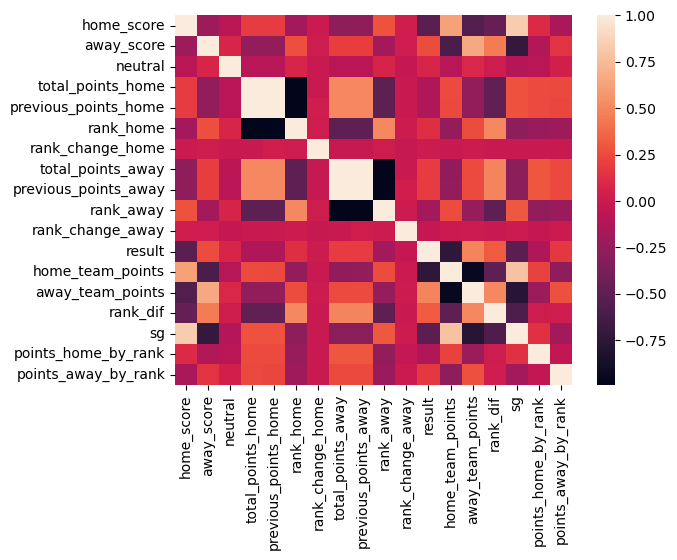

In [43]:
sns.heatmap(results_wc_ranked.corr());

In [45]:
home_team = results_wc_ranked[["date", "home_team", "home_score", "away_score", "rank_home", "rank_away","rank_change_home", "total_points_home", "result", "rank_dif", "points_home_by_rank", "home_team_points"]]

away_team = results_wc_ranked[["date", "away_team", "away_score", "home_score", "rank_away", "rank_home","rank_change_away", "total_points_away", "result", "rank_dif", "points_away_by_rank", "away_team_points"]]

In [46]:
home_team.columns = [h.replace("home_", "").replace("_home", "").replace("away_", "suf_").replace("_away", "_suf") for h in home_team.columns]

away_team.columns = [a.replace("away_", "").replace("_away", "").replace("home_", "suf_").replace("_home", "_suf") for a in away_team.columns]

In [49]:
team_stats = home_team.append(away_team) #.sort_values("date")

In [52]:
stats_val, team_stats = stats(team_stats)

In [53]:
stats_mean = ["goals_mean", "goals_mean_l5", "goals_suf_mean", "goals_suf_mean_l5", "rank_mean", "rank_mean_l5", "points_mean", "points_mean_l5", "game_points_mean", "game_points_mean_l5", "game_points_rank_mean", "game_points_rank_mean_l5"]

In [54]:
stats_df = pd.DataFrame(stats_val, columns=stats_mean)
full_df = pd.concat([team_stats.reset_index(drop=True), stats_df], axis=1, ignore_index=False)

In [55]:
home_team_stats = full_df.iloc[:int(full_df.shape[0]/2),:]
away_team_stats = full_df.iloc[int(full_df.shape[0]/2):,:]

In [56]:
home_team_stats = home_team_stats[home_team_stats.columns[-12:]]
away_team_stats = away_team_stats[away_team_stats.columns[-12:]]

In [57]:
home_team_stats.columns = ['home_'+str(col) for col in home_team_stats.columns]
away_team_stats.columns = ['away_'+str(col) for col in away_team_stats.columns]

In [58]:
match_stats = pd.concat([home_team_stats, away_team_stats.reset_index(drop=True)], axis=1, ignore_index=False)

In [62]:
full_df = pd.concat([results_wc_ranked, match_stats.reset_index(drop=True)], axis=1, ignore_index=False)

In [63]:
full_df["is_friendly"] = full_df["tournament"].apply(lambda x: find_friendly(x))

In [64]:
full_df = pd.get_dummies(full_df, columns=["is_friendly"])

In [65]:

base_df = full_df[["date", "home_team", "away_team", "rank_home", "rank_away","home_score", "away_score","result", "rank_dif", "rank_change_home", "rank_change_away", 'home_goals_mean',
                   'home_goals_mean_l5', 'home_goals_suf_mean', 'home_goals_suf_mean_l5',
                   'home_rank_mean', 'home_rank_mean_l5', 'home_points_mean',
                   'home_points_mean_l5', 'away_goals_mean', 'away_goals_mean_l5',
                   'away_goals_suf_mean', 'away_goals_suf_mean_l5', 'away_rank_mean',
                   'away_rank_mean_l5', 'away_points_mean', 'away_points_mean_l5','home_game_points_mean', 'home_game_points_mean_l5',
                   'home_game_points_rank_mean', 'home_game_points_rank_mean_l5','away_game_points_mean',
                   'away_game_points_mean_l5', 'away_game_points_rank_mean',
                   'away_game_points_rank_mean_l5',
                   'is_friendly_0', 'is_friendly_1']]

In [66]:
base_df_no_fg = base_df.dropna()

In [72]:
base_df_no_fg.head(10)

,date,home_team,away_team,rank_home,rank_away,home_score,away_score,result,rank_dif,rank_change_home,...,home_game_points_mean,home_game_points_mean_l5,home_game_points_rank_mean,home_game_points_rank_mean_l5,away_game_points_mean,away_game_points_mean_l5,away_game_points_rank_mean,away_game_points_rank_mean_l5,is_friendly_0,is_friendly_1
4,2018-08-26,Barbados,Cuba,160.0,181.0,0,0,2,-21.0,0.0,...,1.0,1.0,0.018519,0.018519,0.0,0.0,0.000000,0.000000,0,1
6,2018-08-29,Barbados,Cuba,160.0,181.0,0,2,1,-21.0,0.0,...,1.0,1.0,0.012022,0.012022,0.5,0.5,0.003125,0.003125,0,1
31,2018-09-06,Mongolia,Guam,186.0,190.0,1,1,2,-4.0,0.0,...,3.0,3.0,0.016216,0.016216,0.0,0.0,0.000000,0.000000,1,0
32,2018-09-06,Nepal,Bhutan,161.0,183.0,4,0,0,-22.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1,0
33,2018-09-06,Bangladesh,Pakistan,194.0,201.0,1,0,0,-7.0,0.0,...,1.5,1.5,0.008197,0.008197,3.0,3.0,0.018634,0.018634,1,0
70,2018-09-08,Pakistan,Bhutan,201.0,183.0,3,0,0,18.0,0.0,...,1.5,1.5,0.009317,0.009317,0.0,0.0,0.000000,0.000000,1,0
71,2018-09-08,Bangladesh,Nepal,194.0,161.0,0,2,1,33.0,0.0,...,2.0,2.0,0.010440,0.010440,1.5,1.5,0.008197,0.008197,1,0
74,2018-09-09,France,Netherlands,1.0,17.0,2,1,0,-16.0,-6.0,...,1.0,1.0,0.066667,0.066667,3.0,3.0,0.150000,0.150000,1,0
75,2018-09-09,Ukraine,Slovakia,35.0,26.0,1,0,0,9.0,0.0,...,3.0,3.0,0.068182,0.068182,3.0,3.0,0.333333,0.333333,1,0
76,2018-09-09,Denmark,Wales,9.0,19.0,2,0,0,-10.0,-3.0,...,0.0,0.0,0.000000,0.000000,3.0,3.0,0.103448,0.103448,1,0
